1. Importing and Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, precision_recall_curve)

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

2. Quick EDA and Class Balancing

In [3]:
print(X.shape)
print(y.value_counts(normalize=False))
print(X.isna().sum().sum())
X.describe().T.head()

(569, 30)
1    357
0    212
Name: count, dtype: int64
0


,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634


3. Training/Testing split and Scaling

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

4. Fitting LOgistic Regression

In [5]:
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train_s, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

5. Default Predictions (Threshold = 0.5) and Basic Evaluation

In [6]:
y_prob = model.predict_proba(X_test_s)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

Confusion matrix:
 [[41  1]
 [ 1 71]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

ROC AUC: 0.9957010582010581


6. ROC Curve and AUC Plot

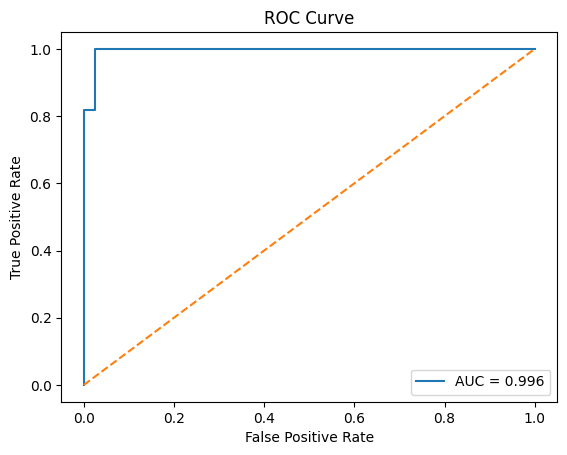

In [7]:
fpr, tpr, roc_thresh = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

7. Precision--Recall Curve

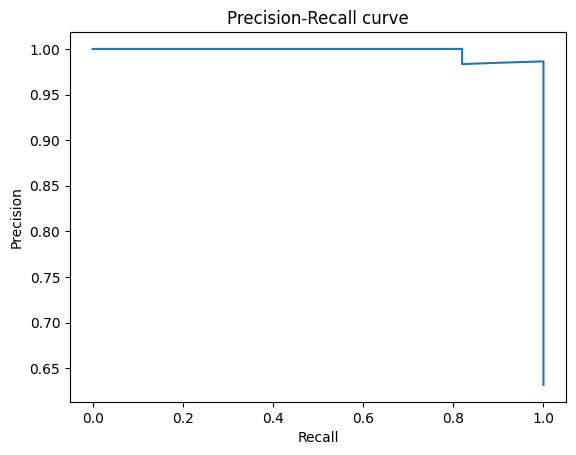

In [8]:
prec, rec, pr_thresh = precision_recall_curve(y_test, y_prob)
plt.figure()
plt.plot(rec, prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

8. Tuning the Decision Threshold

In [9]:
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-12)
best_idx = np.argmax(f1_scores)
best_threshold = pr_thresh[best_idx]
print("Best threshold (max F1):", best_threshold)

y_pred_best = (y_prob >= best_threshold).astype(int)
print("New classification report:\n", classification_report(y_test, y_pred_best))

Best threshold (max F1): 0.35662470485003217
New classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



9. Handling imbalanced classes

In [10]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)